In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

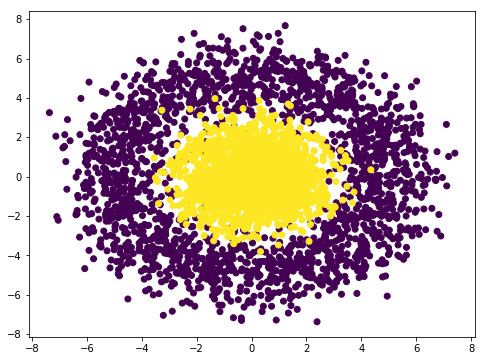

In [3]:
theta = np.linspace(0,2*np.pi,2000)

r1 = 5
r2 = 1

x11 = r1*np.cos(theta) + np.random.randn(2000)
x12 = r1*np.sin(theta) + np.random.randn(2000)
X1 = np.vstack((x11,x12)).T

x21 = r2*np.cos(theta) + np.random.randn(2000)
x22 = r2*np.sin(theta) + np.random.randn(2000)
X2 = np.vstack((x21,x22)).T

X = np.vstack((X1,X2))

y = np.array([0]*int(len(X)/2) + [1]*int(len(X)/2))

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c = y)

In [4]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

In [5]:
P = np.hstack((np.ones((X.shape[0],1)), X**2))

P[:10,:]

array([[1.00000000e+00, 1.74701511e+01, 2.88025210e+00],
       [1.00000000e+00, 3.13026908e+01, 5.01204720e-01],
       [1.00000000e+00, 1.15634216e+01, 1.59555697e-01],
       [1.00000000e+00, 2.42425537e+01, 1.95426706e-03],
       [1.00000000e+00, 8.00874861e+00, 4.86053687e-02],
       [1.00000000e+00, 2.79790125e+01, 6.80445385e-01],
       [1.00000000e+00, 4.56199062e+01, 1.62366834e+00],
       [1.00000000e+00, 2.83716872e+01, 6.39587478e-01],
       [1.00000000e+00, 4.50105954e+01, 3.67110039e-02],
       [1.00000000e+00, 1.77795117e+01, 1.25011017e+00]])

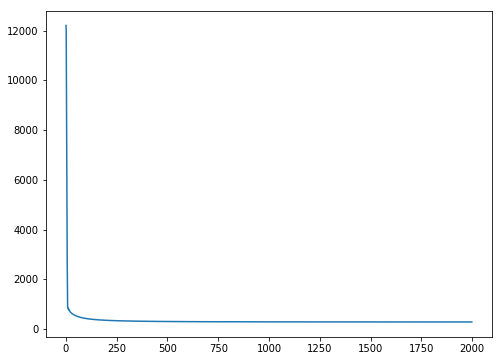

In [6]:
w = np.random.randn(P.shape[1])
J = []
eta = 1e-4
epochs = 2000

for t in range(epochs):
    p = sigmoid(P.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*P.T.dot(p- y)
    
plt.figure(figsize = (8,6))
plt.plot(J)

In [7]:
accuracy(y, p)

0.97475

In [8]:
w

array([ 6.90407313, -0.64767596, -0.64461176])

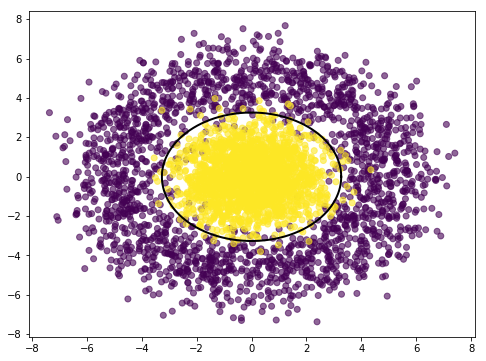

In [9]:

rr = np.sqrt(-(w[0]/w[1]))
p = rr*np.cos(theta) 
m = rr*np.sin(theta)

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)
plt.plot(p, m, color = "black", linewidth = 2)